In [1]:
# Import required libraries
%matplotlib inline
import numpy as np
import yfinance as yf
from arch import arch_model

import matplotlib.pyplot as plt
plt.rc("figure", figsize=(16, 6))
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

In [2]:
# grab some data using the Yfinance API
name = (input("Enter ticker of your choice")).upper()
data = yf.download(name, start="2022-01-01", end="2023-01-01")

Enter ticker of your choice aapl


[*********************100%***********************]  1 of 1 completed


In [3]:
# Compute the simple returns and multiply by 100 to avoid the scaling warning from arch_model.

adjusted_closes = data['Adj Close']
returns = 100 * adjusted_closes.pct_change().dropna()

# Fit a GARCH model

In [4]:
# Fit GARCH model
# Calling arch_model like this does three things:
# - Uses a constant mean
# - Assumes a GARCH(1, 0, 1) volatility model
# - Uses a normal distribution for the standardized errors
model = arch_model(returns)

# After you define the model, fit it
# The library uses an iterative algorithm called maximum likelihood estimation to fit the model
# Details of each iteration prints to the screen.
res = model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 922.4325468144153
Iteration:      2,   Func. Count:     14,   Neg. LLF: 1087.2861221249314
Iteration:      3,   Func. Count:     22,   Neg. LLF: 544.4338154189583
Iteration:      4,   Func. Count:     28,   Neg. LLF: 529.6906425262605
Iteration:      5,   Func. Count:     34,   Neg. LLF: 535.9799772218453
Iteration:      6,   Func. Count:     40,   Neg. LLF: 528.5676861501977
Iteration:      7,   Func. Count:     45,   Neg. LLF: 528.5645410604807
Iteration:      8,   Func. Count:     51,   Neg. LLF: 528.5590084231578
Iteration:      9,   Func. Count:     57,   Neg. LLF: 528.5560532552419
Iteration:     10,   Func. Count:     62,   Neg. LLF: 528.5560484444879
Optimization terminated successfully    (Exit mode 0)
            Current function value: 528.5560484447549
            Iterations: 10
            Function evaluations: 62
            Gradient evaluations: 10


In [5]:
# Now that the model is fit, check the summary.
print(res.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -528.556
Distribution:                  Normal   AIC:                           1065.11
Method:            Maximum Likelihood   BIC:                           1079.00
                                        No. Observations:                  238
Date:                Wed, Dec 14 2022   Df Residuals:                      237
Time:                        08:44:03   Df Model:                            1
                               Mean Model                               
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.0396      0.152     -0.260      0.795 [ -0.338,  0.25

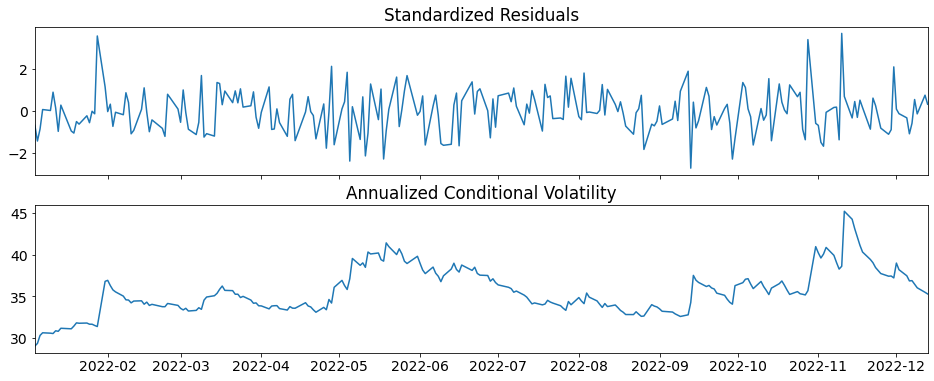

In [6]:
# visualize the standardized residuals and conditional volatility.
fig = res.plot("D")

# Save the figure.
plt.savefig(f"./Images/{name}StandardizedResidualsAndConditionalVolatility.jpg")

In [7]:
# Control the number of forecasts with the horizon argument. 
# The first forecast is used in this example.

# get the variance forecast
forecast = res.forecast(horizon=1, reindex=False)
variance_forecast = forecast.variance.iloc[-1][0]
print('Variance Forecast')
display(variance_forecast)

print()

# compute the annualized volatility forecast
# convert that to a volatility number, take the sqaure root. Then annualize it.
volatility_forecast = np.sqrt(variance_forecast)
print('Volatility Forecast')
display(volatility_forecast)

print()

annualized_volatility_forecast = volatility_forecast * np.sqrt(252) / 100
print('Annualized Volatility Forecast')
display(annualized_volatility_forecast)

Variance Forecast


4.825915795484707


Volatility Forecast


2.196796712371153


Annualized Volatility Forecast


0.34873066691390164